<a href="https://colab.research.google.com/github/Dhanush-adk/machine_learning/blob/main/assignment_4/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score,average_precision_score, log_loss
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [4]:
url = 'https://raw.githubusercontent.com/Dhanush-adk/machine_learning/main/assignment_3/cancer.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = df.drop(columns = ['id', 'Unnamed: 32'])

In [6]:
df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [8]:
scale= StandardScaler()
X_scaled = scale.fit_transform(X) # standardization of dependent variables
X_scaled.shape

(569, 30)

In [9]:
from sklearn.svm import SVC, SVR
np.random.seed(9)

In [16]:
accuracy = []
precision = []
recall = []
f1Score = []
for k in range(1,30,2):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents,
                                                        y,
                                                        train_size = 0.8,
                                                        test_size = 0.20,
                                                        random_state = 100)
    # Linear Support vector classifier
    classifier = SVC(kernel = 'linear', C = 10)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)

    print(f"for k = {k}, accuracy = {acc} , precision = {prec}, recall = {rec} and f1score = {f1}")

for k = 1, accuracy = 0.9385964912280702 , precision = 0.9375, recall = 0.9183673469387755 and f1score = 0.9278350515463918
for k = 3, accuracy = 0.956140350877193 , precision = 0.94, recall = 0.9591836734693877 and f1score = 0.9494949494949495
for k = 5, accuracy = 0.956140350877193 , precision = 0.94, recall = 0.9591836734693877 and f1score = 0.9494949494949495
for k = 7, accuracy = 0.9473684210526315 , precision = 0.9387755102040817, recall = 0.9387755102040817 and f1score = 0.9387755102040817
for k = 9, accuracy = 0.9473684210526315 , precision = 0.9574468085106383, recall = 0.9183673469387755 and f1score = 0.9375000000000001
for k = 11, accuracy = 0.9649122807017544 , precision = 0.9591836734693877, recall = 0.9591836734693877 and f1score = 0.9591836734693877
for k = 13, accuracy = 0.9649122807017544 , precision = 0.9591836734693877, recall = 0.9591836734693877 and f1score = 0.9591836734693877
for k = 15, accuracy = 0.956140350877193 , precision = 0.94, recall = 0.9591836734693877

In [17]:
k_list = [i for i in range(1,30,2)]
k_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

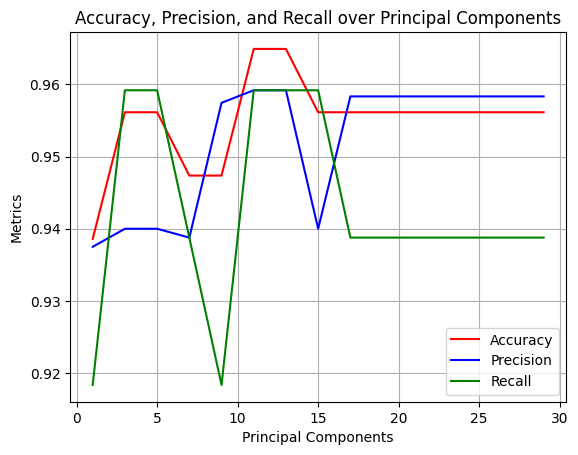

In [19]:
plt.figure()
plt.plot(k_list, accuracy, color = 'red', label = "Accuracy")
plt.plot(k_list, precision, color = 'blue', label = "Precision")
plt.plot(k_list, recall, color = 'green', label = "Recall")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components')
plt.legend()

it is evident that 13 principal components are providing the best accuracy, precision and recall.


so,  k = 13 is the optimal value (considering accuracy, precision and recall)